# PROYECTO GRUPAL: HEART DISEASE
## Partiendo de trece distintos atributos de un paciente, se concluye si desarrolla o no una patología de corazón 
### Por: Cristina Rodríguez Virto y María Fernández Morín

El dataset que vamos a estudiar contiene información sobre 303 distintos pacientes pertenecientes a Cleveland Clinic Foundation. La fecha de la tabla data de julio de 1988. De dichos pacientes se muestran 13 distintas características llegando hasta la columna objetivo de la base de datos: el paciente desarrolla o no una enfermedad de corazón. En total conforman 14 columnas. 

#### El dataset nos proporciona la siguiente información:
1. Age - age in years  
2. Sex    
3. Cp - chest pain type  
4. Trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
5. Chol - serum cholestoral in mg/dl   
6. Fbs - (fasting blood sugar > 120 mg/dl) 
7. Restecg - resting electrocardiographic results 
8. Thalach - maximum heart rate achieved   
9. Exang - exercise induced angina   
10. Oldpeak - ST depression induced by exercise relative to rest    
11. Slope - the slope of the peak exercise ST segment 
12. Ca - number of major vessels colored by flouroscopy  
13. Thal  
14. Target - have disease or not   

#### Su correspondiente en castellano:
1. Edad: edad en años
2. Genero: genero del paciente
3. MT: tipo de molestia torácica
4. PArterial: presión arterial en reposo en mm/Hg
5. Colesterol: colesterol en suero en mg/dl
6. Glucemia: azúcar en sangre del paciente en ayunas
7. EcgReposo: electrocardiograma en reposo
8. FCM: frecuencia cardíaca máxima
9. AIE: angina inducida por el ejercicio
10. STDep: depresión del ST inducida por el ejercicio en relación al descanso
11. Pendiente: la pendiente del ejercicio máximo del segmento ST
12. Vasos: número de vasos principales
13. TipoDefecto: tipo de anomalía que presenta el paciente
14. Enfermedad: indica si el paciente desarrolla o no una patología de corazón

##### Encontramos ciertos valores de diversos atributos que están indicados en números y no se deduce su significado sin una información que procedemos a explicar a continuación:

- Genero - 1: masculino; 2:femenino
- MT - 0: asintomático; 1: angina atípica; 2: ninguna angina detectada; 3: angina común
- Glucemia - 1: mayor a 120 mg/dl; 0: menor a esa cifra
- EcgReposo - 0: que muestra hipertrofia en el ventrículo izquierdo; 1: normal; 2: anormalidad de la onda T
- AIE - 1: sí; 0: no
- Pendiente - 0: en bajada; 1: plana; 2: subida
- TipoDefecto - 0: no claro; 1: anomalía solucionada; 2: normal; 3: defecto reversible

### Seguidamente, vamos a ejecutar el dataset antes de comenzar con el estudio con Spark, para comprobar el balance de los datos, observar de qué manera nos vienen dados los datos y si cuenta con nulos

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

Importamos las librerías necesarias para un primer análisis de los datos y ejecutamos el dataset como primera toma de contacto

In [2]:
tabla = pd.read_csv("./heart.csv")
tabla.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


En nuestro caso, nos gusta mucho la función .info porque nos concreta el número de filas, tipo de datos y columnas sin ocupar mucho espacio del notebook

In [3]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Aunque arriba comprobamos que los valores son non-null, no es un método preciso de comprobarlo, por tanto con la función isnull conseguimos ver los valores NaN que podemos tener y sum nos hace la cuenta en cada columna

In [4]:
#ANALIZAMOS SI EXISTEN VALORES NULOS 
tabla.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Gracias a que no tenemos ningún nulo, no tenemos que modificar nada del dataset que nos proporcionan

### ¿Datos desbalanceados?
En problemas de clasificación como el nuestro puede ocurrir que uno de los grupos de datos sea minoritario, es decir, que se encuentre en menor medida respecto al grupo complementario. Esto provoca un desbalance de los datos que nos sirven para el uso de los algoritmos y de su correspondiente entrenamiento. Este desbarajuste puede ser causante de overfitting y poca precisión en los resultados, el grupo minoritario no se vería correctamente representado con el modelo obtenido.

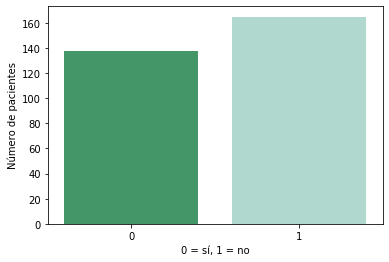

In [312]:
#Para comprobar la distribución de los datos de 'target' graficamos la cantidad de valores de cada tipo que hay con ayuda de la función countplot
sns.countplot(x='target', data=tabla, palette="BuGn_r")
#Target = 0 nos indica que el paciente ha desarrollado una patología; cuando es igual a 1, lo contrario
plt.xlabel("0 = sí, 1 = no")
plt.ylabel("Número de pacientes")
plt.show()

Gracias a este sencillo gráfico, podemos comprobar que la columna objetivo (o columna solución) de nuestro dataset está balanceada, no hay una repartición de datos exagerada o extrema, es decir, está muy bien repartido, con porcentajes bastante razonables a la hora de trabajar con ellos

Obtengamos el porcentaje exacto...

In [6]:
#porcentajes de pacientes con patología y sin patología
countNoEnfermo = len(tabla[tabla.target == 1])
countEnfermo = len(tabla[tabla.target == 0])
print("Porcentaje de pacientes enfermos: {:.2f}%".format((countEnfermo / (len(tabla.target))*100)))
print("Porcentaje de pacientes no enfermos: {:.2f}%".format((countNoEnfermo / (len(tabla.target))*100)))

Porcentaje de pacientes enfermos: 45.54%
Porcentaje de pacientes no enfermos: 54.46%


Esto marca un buen comienzo de nuestro estudio. El desbalance de datos ya no será un problema para nosotras. \
Una vez hemos terminado, comenzamos con la carga de datos en Spark

## SPARK

In [2]:
import findspark
findspark.init()
findspark.find()

import pyspark
findspark.find()

'C:\\spark\\spark-2.3.3-bin-hadoop2.7'

In [3]:
#Necesaria para utilizar la plataforma Spark SQL
from pyspark.sql.types import *

In [5]:
#Creamos el spark context
from pyspark import SparkContext
sc=SparkContext(master="local[3]")
print(sc)

<SparkContext master=local[3] appName=pyspark-shell>


In [6]:
from pyspark.sql.session import SparkSession
spark = SparkSession.builder.appName("spark_heart").getOrCreate()

En el siguiente código abrimos el csv con Spark, colocando el **header** como true debido a que ya contamos con las columnas nombradas en la 1ª línea (encabezado).\
**InferSchema** establece que Spark trate de inferir que tipo de datos tiene cada columna (entero, string, etc). Nosotras al haber comprobado anteriormente que tenemos los datos limpios y saber bien que tenemos en cada columna, lo colocamos como true.\
**Sep** establece que sea una coma (por defecto) la que actúe a modo de separador de campos en el archivo de datos.

In [7]:
#Mostramos como se ven los datos en Spark
heart_df = spark.read.csv('./heart.csv', header='true', inferSchema='true', sep=',') 
heart_df.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

Otra maneras de mostrar los datos...

In [165]:
heart_df.collect()

[Row(Edad=63, Genero=1, MT=3, PArterial=145, Colesterol=233, Glucemia=1, EcgReposo=0, FCM=150, AIE=0, STDep=2.3, Pendiente=0, Vasos=0, TipoDefecto=1, Enfermedad=1.0),
 Row(Edad=37, Genero=1, MT=2, PArterial=130, Colesterol=250, Glucemia=0, EcgReposo=1, FCM=187, AIE=0, STDep=3.5, Pendiente=0, Vasos=0, TipoDefecto=2, Enfermedad=1.0),
 Row(Edad=41, Genero=0, MT=1, PArterial=130, Colesterol=204, Glucemia=0, EcgReposo=0, FCM=172, AIE=0, STDep=1.4, Pendiente=2, Vasos=0, TipoDefecto=2, Enfermedad=1.0),
 Row(Edad=56, Genero=1, MT=1, PArterial=120, Colesterol=236, Glucemia=0, EcgReposo=1, FCM=178, AIE=0, STDep=0.8, Pendiente=2, Vasos=0, TipoDefecto=2, Enfermedad=1.0),
 Row(Edad=57, Genero=0, MT=0, PArterial=120, Colesterol=354, Glucemia=0, EcgReposo=1, FCM=163, AIE=1, STDep=0.6, Pendiente=2, Vasos=0, TipoDefecto=2, Enfermedad=1.0),
 Row(Edad=57, Genero=1, MT=0, PArterial=140, Colesterol=192, Glucemia=0, EcgReposo=1, FCM=148, AIE=0, STDep=0.4, Pendiente=1, Vasos=0, TipoDefecto=1, Enfermedad=1.0)

LLegados a este punto, nos dimos cuenta de que lo adecuado era cambiar el nombre de los distintos campos al castellano, de manera que sean más comprensibles. Están nombrados de acuerdo al significado de cada columna.

In [8]:
#RENOMBRAMOS LAS COLUMNAS para una mejor comprension
heart_df=heart_df.withColumnRenamed('age','Edad')
heart_df=heart_df.withColumnRenamed('sex','Genero')
heart_df=heart_df.withColumnRenamed('cp','MT')
heart_df=heart_df.withColumnRenamed('trestbps','PArterial')
heart_df=heart_df.withColumnRenamed('chol','Colesterol')
heart_df=heart_df.withColumnRenamed('fbs','Glucemia')
heart_df=heart_df.withColumnRenamed('restecg','EcgReposo')
heart_df=heart_df.withColumnRenamed('thalach','FCM')
heart_df=heart_df.withColumnRenamed('exang','AIE')
heart_df=heart_df.withColumnRenamed('oldpeak','STDep')
heart_df=heart_df.withColumnRenamed('slope','Pendiente')
heart_df=heart_df.withColumnRenamed('ca','Vasos')
heart_df=heart_df.withColumnRenamed('thal','TipoDefecto')
heart_df=heart_df.withColumnRenamed('target','Enfermedad')

A continuación, empezamos a jugar con distintas consultas de Spark con el objetivo de comprobar que los cambios se habían completado bien y todo se veía correctamente

In [16]:
#Verificamos que el cambio se ha ejecutado bien
heart_df.columns

['Edad',
 'Genero',
 'MT',
 'PArterial',
 'Colesterol',
 'Glucemia',
 'EcgReposo',
 'FCM',
 'AIE',
 'STDep',
 'Pendiente',
 'Vasos',
 'TipoDefecto',
 'Enfermedad']

In [17]:
#Cómo se ven las tres primeras filas
heart_df.head(3)

[Row(Edad=63, Genero=1, MT=3, PArterial=145, Colesterol=233, Glucemia=1, EcgReposo=0, FCM=150, AIE=0, STDep=2.3, Pendiente=0, Vasos=0, TipoDefecto=1, Enfermedad=1),
 Row(Edad=37, Genero=1, MT=2, PArterial=130, Colesterol=250, Glucemia=0, EcgReposo=1, FCM=187, AIE=0, STDep=3.5, Pendiente=0, Vasos=0, TipoDefecto=2, Enfermedad=1),
 Row(Edad=41, Genero=0, MT=1, PArterial=130, Colesterol=204, Glucemia=0, EcgReposo=0, FCM=172, AIE=0, STDep=1.4, Pendiente=2, Vasos=0, TipoDefecto=2, Enfermedad=1)]

In [18]:
#Mostramos la columna Edad 
heart_df.select('Edad').distinct().show()

+----+
|Edad|
+----+
|  65|
|  53|
|  34|
|  76|
|  44|
|  47|
|  52|
|  40|
|  57|
|  54|
|  48|
|  64|
|  41|
|  43|
|  37|
|  61|
|  35|
|  59|
|  55|
|  39|
+----+
only showing top 20 rows



In [7]:
#Mostramos el dataframe en castellano entero, que no lo habíamos hecho hasta ahora
heart_df.show()

+----+------+---+---------+----------+--------+---------+---+---+-----+---------+-----+-----------+----------+
|Edad|Genero| MT|PArterial|Colesterol|Glucemia|EcgReposo|FCM|AIE|STDep|Pendiente|Vasos|TipoDefecto|Enfermedad|
+----+------+---+---------+----------+--------+---------+---+---+-----+---------+-----+-----------+----------+
|  63|     1|  3|      145|       233|       1|        0|150|  0|  2.3|        0|    0|          1|         1|
|  37|     1|  2|      130|       250|       0|        1|187|  0|  3.5|        0|    0|          2|         1|
|  41|     0|  1|      130|       204|       0|        0|172|  0|  1.4|        2|    0|          2|         1|
|  56|     1|  1|      120|       236|       0|        1|178|  0|  0.8|        2|    0|          2|         1|
|  57|     0|  0|      120|       354|       0|        1|163|  1|  0.6|        2|    0|          2|         1|
|  57|     1|  0|      140|       192|       0|        1|148|  0|  0.4|        1|    0|          1|         1|
|

In [20]:
#Lo hacemos para que nos coja el tipo de dato en el schema
heart_df.dtypes 

[('Edad', 'int'),
 ('Genero', 'int'),
 ('MT', 'int'),
 ('PArterial', 'int'),
 ('Colesterol', 'int'),
 ('Glucemia', 'int'),
 ('EcgReposo', 'int'),
 ('FCM', 'int'),
 ('AIE', 'int'),
 ('STDep', 'double'),
 ('Pendiente', 'int'),
 ('Vasos', 'int'),
 ('TipoDefecto', 'int'),
 ('Enfermedad', 'int')]

In [329]:
#Para que capte los nuevos nombres de las columnas en el schema
heart_df.schema.names 

['Edad',
 'Genero',
 'MT',
 'PArterial',
 'Colesterol',
 'Glucemia',
 'EcgReposo',
 'FCM',
 'AIE',
 'STDep',
 'Pendiente',
 'Vasos',
 'TipoDefecto',
 'Enfermedad']

In [22]:
#Que schema tenemos
heart_df.schema

StructType(List(StructField(Edad,IntegerType,true),StructField(Genero,IntegerType,true),StructField(MT,IntegerType,true),StructField(PArterial,IntegerType,true),StructField(Colesterol,IntegerType,true),StructField(Glucemia,IntegerType,true),StructField(EcgReposo,IntegerType,true),StructField(FCM,IntegerType,true),StructField(AIE,IntegerType,true),StructField(STDep,DoubleType,true),StructField(Pendiente,IntegerType,true),StructField(Vasos,IntegerType,true),StructField(TipoDefecto,IntegerType,true),StructField(Enfermedad,IntegerType,true)))

In [23]:
#lo imprimimos
heart_df.printSchema()

root
 |-- Edad: integer (nullable = true)
 |-- Genero: integer (nullable = true)
 |-- MT: integer (nullable = true)
 |-- PArterial: integer (nullable = true)
 |-- Colesterol: integer (nullable = true)
 |-- Glucemia: integer (nullable = true)
 |-- EcgReposo: integer (nullable = true)
 |-- FCM: integer (nullable = true)
 |-- AIE: integer (nullable = true)
 |-- STDep: double (nullable = true)
 |-- Pendiente: integer (nullable = true)
 |-- Vasos: integer (nullable = true)
 |-- TipoDefecto: integer (nullable = true)
 |-- Enfermedad: integer (nullable = true)



Pese a que nuestro esquema estaba correctamente inferido, decidimos crear el nuestro simplemente por probar y utilizar el siguiente código por si hacía falta. Nunca viene mal el código de más.

In [9]:
#Creamos nuestro esquema
miesquema = StructType([
    StructField("Edad", IntegerType(), True),    
    StructField("Genero", IntegerType(), True),
    StructField("MT", IntegerType(), True),
    StructField("PArterial", IntegerType(), True),
    StructField("Colesterol", IntegerType(), True),
    StructField("Glucemia", IntegerType(), True),
    StructField("EcgReposo", IntegerType(), True),
    StructField("FCM", IntegerType(), True),
    StructField("AIE", IntegerType(), True),
    StructField("STDep", DoubleType(), True),
    StructField("Pendiente", IntegerType(), True),
    StructField("Vasos", IntegerType(), True),
    StructField("TipoDefecto", IntegerType(), True),
    StructField("Enfermedad", IntegerType(), True)
])

Debido a que hemos realizado nuestro propio esquema, procedemos a desabilitar la función de inferirlo y colocar el nuestro como el correcto, a pesar de que no hubiese diferencias a simple vista.

In [10]:
#Colocamos nuestro esquema como el correcto
heart_df = spark.read.csv('./heart.csv', header='true', inferSchema= 'false', schema = miesquema )

In [10]:
#Así se ve nuestro esquema
miesquema

StructType(List(StructField(Edad,IntegerType,true),StructField(Genero,IntegerType,true),StructField(MT,IntegerType,true),StructField(PArterial,IntegerType,true),StructField(Colesterol,IntegerType,true),StructField(Glucemia,IntegerType,true),StructField(EcgReposo,IntegerType,true),StructField(FCM,IntegerType,true),StructField(AIE,IntegerType,true),StructField(STDep,DoubleType,true),StructField(Pendiente,IntegerType,true),StructField(Vasos,IntegerType,true),StructField(TipoDefecto,IntegerType,true),StructField(Enfermedad,IntegerType,true)))

## SQL

SQL Spark es un módulo Spark que sirve para procesar datos estructurados y resulta de utilidad como motor SQL distribuido. Es importante recalcar que cuando se habla de datos estructurados se refiere a la información que suele encontrarse en la mayoría de bases de datos, información etiquetada y controlada que puede encontrarse en filas o en columnas.\
Con SQL Spark, podemos consultar datos en bases y otros conjuntos de datos.\
El uso de este módulo consiste en ejecutar consultas SQL

In [20]:
#Creamos la tabla
heart_df.createOrReplaceTempView("heart_tb")

In [168]:
#Hacemos un count del número de filas de la tabla
spark.sql("select count(*) from heart_tb").collect()

[Row(count(1)=303)]

In [169]:
#Realizamos una búsqueda de las distintas edades que tiene la tabla. Es similar a buscar los valores únicos con la función unique()
spark.sql('select distinct(Edad)from heart_tb').collect()

[Row(Edad=65),
 Row(Edad=53),
 Row(Edad=34),
 Row(Edad=76),
 Row(Edad=44),
 Row(Edad=47),
 Row(Edad=52),
 Row(Edad=40),
 Row(Edad=57),
 Row(Edad=54),
 Row(Edad=48),
 Row(Edad=64),
 Row(Edad=41),
 Row(Edad=43),
 Row(Edad=37),
 Row(Edad=61),
 Row(Edad=35),
 Row(Edad=59),
 Row(Edad=55),
 Row(Edad=39),
 Row(Edad=49),
 Row(Edad=51),
 Row(Edad=69),
 Row(Edad=63),
 Row(Edad=77),
 Row(Edad=50),
 Row(Edad=45),
 Row(Edad=38),
 Row(Edad=70),
 Row(Edad=62),
 Row(Edad=29),
 Row(Edad=60),
 Row(Edad=56),
 Row(Edad=58),
 Row(Edad=71),
 Row(Edad=68),
 Row(Edad=42),
 Row(Edad=66),
 Row(Edad=46),
 Row(Edad=67),
 Row(Edad=74)]

In [170]:
#Hacemos un collect de todos los valores de Edad distintos que hay con todas sus posibilidades de Enfermedad que hay
spark.sql('select distinct(Edad), Enfermedad from heart_tb').collect()

[Row(Edad=66, Enfermedad=1.0),
 Row(Edad=71, Enfermedad=1.0),
 Row(Edad=49, Enfermedad=1.0),
 Row(Edad=58, Enfermedad=1.0),
 Row(Edad=53, Enfermedad=1.0),
 Row(Edad=56, Enfermedad=0.0),
 Row(Edad=50, Enfermedad=1.0),
 Row(Edad=46, Enfermedad=1.0),
 Row(Edad=58, Enfermedad=0.0),
 Row(Edad=40, Enfermedad=0.0),
 Row(Edad=77, Enfermedad=0.0),
 Row(Edad=56, Enfermedad=1.0),
 Row(Edad=63, Enfermedad=1.0),
 Row(Edad=64, Enfermedad=0.0),
 Row(Edad=47, Enfermedad=0.0),
 Row(Edad=74, Enfermedad=1.0),
 Row(Edad=47, Enfermedad=1.0),
 Row(Edad=57, Enfermedad=0.0),
 Row(Edad=70, Enfermedad=0.0),
 Row(Edad=48, Enfermedad=1.0),
 Row(Edad=40, Enfermedad=1.0),
 Row(Edad=60, Enfermedad=0.0),
 Row(Edad=67, Enfermedad=1.0),
 Row(Edad=46, Enfermedad=0.0),
 Row(Edad=52, Enfermedad=1.0),
 Row(Edad=54, Enfermedad=1.0),
 Row(Edad=53, Enfermedad=0.0),
 Row(Edad=59, Enfermedad=1.0),
 Row(Edad=61, Enfermedad=1.0),
 Row(Edad=60, Enfermedad=1.0),
 Row(Edad=39, Enfermedad=0.0),
 Row(Edad=55, Enfermedad=0.0),
 Row(Eda

In [28]:
spark.sql("select count (distinct Edad = 67) from heart_tb where Enfermedad = 0").collect()

[Row(count(DISTINCT (Edad = 67))=2)]

In [30]:
spark.sql("select count(Edad = 67) from heart_tb where Enfermedad = 1").collect()

[Row(count((Edad = 67))=165)]

In [41]:
spark.sql("select Colesterol = 135 from heart_tb where Enfermedad = 0")

DataFrame[(Colesterol = 135): boolean]

In [52]:
#Nos devuelve el tipo de molestia torácica de los pacientes que tienen el colesterol entre 400 y 564
spark.sql("select MT from heart_tb where Colesterol >= 400 AND Colesterol <= 564").show()

+---+
| MT|
+---+
|  2|
|  2|
|  0|
|  0|
+---+



In [64]:
spark.sql("select Colesterol from heart_tb where Edad >= 70 AND Edad <= 77").show()

+----------+
|Colesterol|
+----------+
|       302|
|       265|
|       269|
|       197|
|       245|
|       149|
|       174|
|       322|
|       304|
|       269|
+----------+



In [70]:
spark.sql("select Enfermedad from heart_tb where Edad >= 29 AND Edad <= 38").show()

+----------+
|Enfermedad|
+----------+
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         0|
|         0|
|         0|
+----------+



In [172]:
spark.sql("select count(distinct MT = 2) from heart_tb").collect()

[Row(count(DISTINCT (MT = 2))=2)]

In [72]:
#pacientes de 65 años que desarrollan una patología
spark.sql("select count(distinct Edad = 65, Enfermedad = 0) from heart_tb").collect()

[Row(count(DISTINCT (Edad = 65), (Enfermedad = 0))=4)]

In [52]:
spark.sql("select count(distinct Enfermedad = 0) from heart_tb").collect()

[Row(count(DISTINCT (Enfermedad = 0))=2)]

## Transformers

El proceso que realizan los transformers nos sirve para escalar, convertir o modificar características.\
Lo primero que vamos a hacer es crear el esquema con los tipos de las variables que vamos a utilizar

In [11]:
import pyspark.sql.types as typ
import pandas as pd

labels = [
    ("Enfermedad", typ.IntegerType()),
    ("Edad", typ.IntegerType()),   
    ("Genero", typ.IntegerType()),
    ("MT",  typ.IntegerType()),
    ("PArterial", typ.IntegerType()),
    ("Colesterol", typ.IntegerType()),
    ("Glucemia", typ.IntegerType()),
    ("EcgReposo", typ.IntegerType()),
    ("FCM", typ.IntegerType()),
    ("AIE", typ.IntegerType()),
    ("STDep", typ.DoubleType()),
    ("Pendiente", typ.IntegerType()),
    ("Vasos", typ.IntegerType()),
    ("TipoDefecto",typ.IntegerType())
]

schema = typ.StructType([
   typ.StructField(e[0], e[1], False) for e in labels
])

In [12]:
schema

StructType(List(StructField(Enfermedad,IntegerType,false),StructField(Edad,IntegerType,false),StructField(Genero,IntegerType,false),StructField(MT,IntegerType,false),StructField(PArterial,IntegerType,false),StructField(Colesterol,IntegerType,false),StructField(Glucemia,IntegerType,false),StructField(EcgReposo,IntegerType,false),StructField(FCM,IntegerType,false),StructField(AIE,IntegerType,false),StructField(STDep,DoubleType,false),StructField(Pendiente,IntegerType,false),StructField(Vasos,IntegerType,false),StructField(TipoDefecto,IntegerType,false)))

In [12]:
heart_df.columns

['Edad',
 'Genero',
 'MT',
 'PArterial',
 'Colesterol',
 'Glucemia',
 'EcgReposo',
 'FCM',
 'AIE',
 'STDep',
 'Pendiente',
 'Vasos',
 'TipoDefecto',
 'Enfermedad']

In [13]:
heart_df.dtypes

[('Edad', 'int'),
 ('Genero', 'int'),
 ('MT', 'int'),
 ('PArterial', 'int'),
 ('Colesterol', 'int'),
 ('Glucemia', 'int'),
 ('EcgReposo', 'int'),
 ('FCM', 'int'),
 ('AIE', 'int'),
 ('STDep', 'double'),
 ('Pendiente', 'int'),
 ('Vasos', 'int'),
 ('TipoDefecto', 'int'),
 ('Enfermedad', 'int')]

###### Creamos el transformer

In [12]:
import pyspark.ml.feature as ft

In [13]:
#para que sea de tipo double, porque así es como debemos introducir sus valores
from pyspark.sql.types import DoubleType
heart_df = heart_df.withColumn("Enfermedad", heart_df["Enfermedad"].cast(DoubleType()))

Creamos un transformer del tipo Vector Assembler que guarda todas nuestras variables menos la variable objetivo (Enfermedad) en un vector que llamaremos features. 

In [14]:
featuresCreator = ft.VectorAssembler(
    inputCols=['Edad','Genero','MT','PArterial','Colesterol','Glucemia','EcgReposo','FCM','AIE','STDep','Pendiente','Vasos','TipoDefecto'], 
    outputCol='features'
)
output = featuresCreator.transform(heart_df)

In [15]:
#output es un nuevo dataframe que contiene las columnas originales y la creada
print("Assembled columns to vector column 'features'")
output.select("features", "Enfermedad").show(truncate=False)

Assembled columns to vector column 'features'
+------------------------------------------------------------+----------+
|features                                                    |Enfermedad|
+------------------------------------------------------------+----------+
|[63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0]|1.0       |
|[37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0]|1.0       |
|[41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0]|1.0       |
|[56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0]|1.0       |
|[57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0]|1.0       |
|[57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0]|1.0       |
|[56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0]|1.0       |
|[44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0]|1.0       |
|[52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0]|1.0       |
|[57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0]|1.0 

In [16]:
featuresCreator

VectorAssembler_4b0495148c588639290f

In [17]:
heart_df

DataFrame[Edad: int, Genero: int, MT: int, PArterial: int, Colesterol: int, Glucemia: int, EcgReposo: int, FCM: int, AIE: int, STDep: double, Pendiente: int, Vasos: int, TipoDefecto: int, Enfermedad: double]

In [16]:
output

DataFrame[Edad: int, Genero: int, MT: int, PArterial: int, Colesterol: int, Glucemia: int, EcgReposo: int, FCM: int, AIE: int, STDep: double, Pendiente: int, Vasos: int, TipoDefecto: int, Enfermedad: double, features: vector]

# Algoritmos empleados:

El nuestro se trata de un problema de clasificación. El DataFrame cuenta con entradas y salidas hasta concluir en una solución de dos tipos distintos.\
Ya que nuestro target es una variable discreta vamos a utilizar algoritmos de clasificación, en nuestro caso hemos elegido random forest y logistic regression  ya que con estos algoritmos se pueden emplear para determinar la enfermedad de una persona de acuerdo a los síntomas que presenta. 

# 1. Logistic Regression

Definimos los valores iniciales para los parametros de regresion logistica: maxIter y regPram

In [174]:
import pyspark.ml.classification as cl

logistic = cl.LogisticRegression(
    maxIter=2, 
    #regParam corresponds to  λ, debe ser >=0, por defecto 0.0
    regParam=0.01, 
    labelCol='Enfermedad')
#después te ejecuta todo y como una de las mejoras, te dice cual es la mejor combinación de parámetros

###### Creamos el pipeline

A continuación, creamos un pipeline que nos sirve para encapsular el estimador y los transformers para ejecutarlos.

In [175]:
from pyspark.ml import Pipeline
#el pipeline pasará por 2 estados
pipeline = Pipeline(stages=[featuresCreator, logistic])

###### Conjuntos de train y test

Dividimos los datos en un 80% para el conjunto train y un 20% para el test, para después entrenar al modelo

In [176]:
heart_train, heart_test = heart_df.randomSplit([0.8, 0.2], seed=666)

In [177]:
heart_train.head()

Row(Edad=29, Genero=1, MT=1, PArterial=130, Colesterol=204, Glucemia=0, EcgReposo=0, FCM=202, AIE=0, STDep=0.0, Pendiente=2, Vasos=0, TipoDefecto=2, Enfermedad=1.0)

In [178]:
heart_test.head()

Row(Edad=35, Genero=1, MT=0, PArterial=126, Colesterol=282, Glucemia=0, EcgReposo=0, FCM=156, AIE=1, STDep=0.0, Pendiente=2, Vasos=0, TipoDefecto=3, Enfermedad=0.0)

#### Entrenamos el modelo

In [179]:
model = pipeline.fit(heart_train)

In [180]:
test_model = model.transform(heart_test)

In [181]:
test_model.take(1)#de la primera columna
#nos devuleve un vector disperso 9 columnas y la 0 tiene un 1 y etc. Features es el vector disperso con todas las columnas que yo tengo guardadas. Las que no aparecen son 0
#rawprediction y probability los habrá sacado del test
#el valor buscado lo ha metido en prediction

[Row(Edad=35, Genero=1, MT=0, PArterial=126, Colesterol=282, Glucemia=0, EcgReposo=0, FCM=156, AIE=1, STDep=0.0, Pendiente=2, Vasos=0, TipoDefecto=3, Enfermedad=0.0, features=DenseVector([35.0, 1.0, 0.0, 126.0, 282.0, 0.0, 0.0, 156.0, 1.0, 0.0, 2.0, 0.0, 3.0]), rawPrediction=DenseVector([-0.1096, 0.1096]), probability=DenseVector([0.4726, 0.5274]), prediction=1.0)]

# Evaluamos el modelo

#### Curvas ROC y PR

Las curvas PR y ROC nos ayudan a ver el equilibrio entre precisión y sensibilidad de un modelo.


In [182]:
import pyspark.ml.evaluation as ev

evaluatorLG = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability', 
    labelCol='Enfermedad')

print(evaluatorLG.evaluate(test_model, 
     {evaluatorLG.metricName: 'areaUnderROC'})) #area bajo la curva ROC
print(evaluatorLG.evaluate(test_model, {evaluatorLG.metricName: 'areaUnderPR'})) #bajo precisión y recall

0.898989898989899
0.909626202913287


#### Accuracy, F1, precision y recall:

Precisión - La precisión es la relación entre las observaciones positivas correctamente previstas y el total de observaciones positivas previstas.\
Recall (Sensibilidad) - El recall es la relación entre las observaciones positivas correctamente predichas y todas las observaciones de la clase real.\
Puntuación F1 - La puntuación F1 es el promedio ponderado de la precisión y el recall. Por lo tanto, esta puntuación tiene en cuenta tanto los falsos positivos como los falsos negativos.

In [183]:
predictions = model.transform(heart_test)

In [184]:
evaluatorALG = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="accuracy")
accuracy = evaluatorALG.evaluate(predictions)
print("Accuracy = %g" % accuracy)
 
evaluatorf1 = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="f1")
f1 = evaluatorf1.evaluate(predictions)
print("f1 = %g" % f1)
 
evaluatorwp = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedPrecision")
wp = evaluatorwp.evaluate(predictions)
print("weightedPrecision = %g" % wp)
 
evaluatorwr = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedRecall")
wr = evaluatorwr.evaluate(predictions)
print("weightedRecall = %g" % wr)

Accuracy = 0.777778
f1 = 0.772696
weightedPrecision = 0.794531
weightedRecall = 0.777778


# Hyper-tunning de los parámetros para LR

El hyper-tunning de los parámetros consiste en mejorar el modelo estudiando cual resulta ser la mejor combinación de parámetros a introducir en el algoritmo.\
Al dar con una combinación optimizada, a su vez mejoraremos los resultados del modelo.

El proceso de ajuste optimiza los parámetros del modelo para que éste se ajuste a los datos de entrenamiento tan bien como pueda.

In [185]:
import pyspark.ml.tuning as tune

In [186]:
evaluator = ev.BinaryClassificationEvaluator(rawPredictionCol='probability', labelCol='Enfermedad')

Creamos un grid donde establecemos diferentes valores de los parámetros y evaluamos como se comportan en el algorimo. 

In [187]:
logistic = cl.LogisticRegression(labelCol='Enfermedad')

grid_lg = tune.ParamGridBuilder().addGrid(logistic.maxIter, [2, 10, 50]).addGrid(logistic.regParam, [0.01, 0.05, 0.3]).build()

In [188]:
cv = tune.CrossValidator(estimator=logistic, estimatorParamMaps=grid_lg , evaluator=evaluator)

In [209]:
pipeline = Pipeline(stages=[featuresCreator])
data_transformer = pipeline.fit(heart_train)

In [190]:
cvModel = cv.fit(data_transformer.transform(heart_train))

#### Evaluamos los resultados obtenidos

Realizamos un proceso parecido al inicial en el que evaluamos el algoritmo

In [191]:
data_train = data_transformer.transform(heart_test)
results = cvModel.transform(data_train)

print(evaluator.evaluate(results, {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(results, {evaluator.metricName: 'areaUnderPR'}))

0.908080808080808
0.9172456820888996


#### Obtenemos los parametros empleados 

In [192]:
results = [
    ([{key.name: paramValue} 
            for key, paramValue 
            in zip(
                params.keys(), 
                params.values())], 
                metric) 
    for params, metric 
    in zip(
        cvModel.getEstimatorParamMaps(), 
        cvModel.avgMetrics)]

sorted(results, key=lambda el: el[1], reverse=True)[0]

([{'maxIter': 50}, {'regParam': 0.3}], 0.9003040671645325)

In [193]:
cvModel.bestModel._java_obj.getMaxIter()

50

In [194]:
cvModel.bestModel._java_obj.getRegParam()

0.3

Según los resultados obtenidos, los parámetros más adecuados a introducir serían:
- MaxIter = 50
- RegParam = 0.3

In [210]:
predictions = data_transformer.transform(heart_test)

In [211]:
evaluatorALG = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="accuracy")
accuracy = evaluatorALG.evaluate(predictions)
print("Accuracy = %g" % accuracy)
 
evaluatorf1 = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="f1")
f1 = evaluatorf1.evaluate(predictions)
print("f1 = %g" % f1)
 
evaluatorwp = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedPrecision")
wp = evaluatorwp.evaluate(predictions)
print("weightedPrecision = %g" % wp)
 
evaluatorwr = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedRecall")
wr = evaluatorwr.evaluate(predictions)
print("weightedRecall = %g" % wr)

Accuracy = 0.825397
f1 = 0.822238
weightedPrecision = 0.840735
weightedRecall = 0.825397


# Cross validation con k fold para LR

Es una técnica de particionado de datos, que  se emplea para conseguir los resultados más óptimos para el algoritmo.

In [35]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
paramGrid = ParamGridBuilder() \
    .addGrid(logistic.regParam, [0.3]) \
    .addGrid(logistic.maxIter, [50]) \
    .build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(rawPredictionCol='Enfermedad', labelCol='Enfermedad'),
                          numFolds=3)  # use 3+ folds in practice

In [36]:
# Run cross-validation, and choose the best set of parameters.
cvModelKF = crossval.fit(heart_train)

In [37]:
test = heart_test

In [38]:
prediction = cvModelKF.transform(test)
selected = prediction.select('Enfermedad')
for row in selected.collect():
    print(row)

Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)


#### Evaluamos el modelo y vemos si ha mejorado

In [53]:
predictions = model.transform(heart_train)

In [54]:
evaluatorALG = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="accuracy")
accuracy = evaluatorALG.evaluate(predictions)
print("Accuracy = %g" % accuracy)
 
evaluatorf1 = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="f1")
f1 = evaluatorf1.evaluate(predictions)
print("f1 = %g" % f1)
 
evaluatorwp = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedPrecision")
wp = evaluatorwp.evaluate(predictions)
print("weightedPrecision = %g" % wp)
 
evaluatorwr = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedRecall")
wr = evaluatorwr.evaluate(predictions)
print("weightedRecall = %g" % wr)

Accuracy = 0.85
f1 = 0.848849
weightedPrecision = 0.852083
weightedRecall = 0.85


# 2. Random Forest  

Definimos los valores iniciales para los parametros de random forest: numTrees y maxDepth

En este caso hacemos una partición de los datos en train y test diferente

In [55]:
heart_trainRF, heart_testRF =  heart_df.randomSplit([0.7, 0.3], seed=666)

In [56]:
classifier = cl.RandomForestClassifier(
    numTrees=5, 
    maxDepth=5, 
    labelCol='Enfermedad')

pipeline = Pipeline(
    stages=[featuresCreator, classifier])

model = pipeline.fit(heart_trainRF)
test = model.transform(heart_testRF)

In [57]:
test.take(1)

[Row(Edad=35, Genero=1, MT=0, PArterial=126, Colesterol=282, Glucemia=0, EcgReposo=0, FCM=156, AIE=1, STDep=0.0, Pendiente=2, Vasos=0, TipoDefecto=3, Enfermedad=0.0, features=DenseVector([35.0, 1.0, 0.0, 126.0, 282.0, 0.0, 0.0, 156.0, 1.0, 0.0, 2.0, 0.0, 3.0]), rawPrediction=DenseVector([1.9333, 3.0667]), probability=DenseVector([0.3867, 0.6133]), prediction=1.0)]

# Evaluamos el modelo

#### Curvas ROC y PR

In [58]:
import pyspark.ml.evaluation as ev

evaluatorRF = ev.BinaryClassificationEvaluator(rawPredictionCol='probability', labelCol='Enfermedad')

print(evaluatorRF.evaluate(test, 
     {evaluatorRF.metricName: 'areaUnderROC'}))
print(evaluatorRF.evaluate(test, {evaluatorRF.metricName: 'areaUnderPR'}))

0.8608695652173914
0.8113627367542955


#### Accuracy, F1, precision y recall:

In [59]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictions = model.transform(heart_testRF)

In [60]:
evaluatorARF = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="accuracy")
accuracy = evaluatorARF.evaluate(predictions)
print("Accuracy = %g" % accuracy)
 
evaluatorf1 = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="f1")
f1 = evaluatorf1.evaluate(predictions)
print("f1 = %g" % f1)
 
evaluatorwp = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedPrecision")
wp = evaluatorwp.evaluate(predictions)
print("weightedPrecision = %g" % wp)
 
evaluatorwr = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedRecall")
wr = evaluatorwr.evaluate(predictions)
print("weightedRecall = %g" % wr)

Accuracy = 0.758242
f1 = 0.757891
weightedPrecision = 0.760484
weightedRecall = 0.758242


## Hyper-tunning de los parámetros para RF

In [61]:
evaluator = ev.BinaryClassificationEvaluator(rawPredictionCol='probability', labelCol='Enfermedad')

In [62]:
classifier = cl.RandomForestClassifier(labelCol='Enfermedad')

grid_rf = tune.ParamGridBuilder().addGrid(classifier.numTrees, [10, 20, 5]).addGrid(classifier.maxDepth, [6, 9, 15]).build()


In [63]:
cv = tune.CrossValidator(estimator=logistic, estimatorParamMaps=grid_rf , evaluator=evaluator)

In [64]:
pipeline = Pipeline(stages=[featuresCreator])
data_transformer = pipeline.fit(heart_trainRF)

In [65]:
cvModel = cv.fit(data_transformer.transform(heart_trainRF))

#### Evaluamos los resultados obtenidos

In [66]:
#a ver que valor nos da, a ver si son mejores
data_train = data_transformer.transform(heart_testRF)
results = cvModel.transform(data_train)

print(evaluator.evaluate(results, {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(results, {evaluator.metricName: 'areaUnderPR'}))

0.906280193236715
0.9120983131733811


#### Obtenemos los parametros empleados 

In [67]:
results = [
    ([{key.name: paramValue} 
            for key, paramValue 
            in zip(
                params.keys(), 
                params.values())], 
                metric) 
    
    for params, metric 
    in zip(
        cvModel.getEstimatorParamMaps(), 
        cvModel.avgMetrics)]

sorted(results, key=lambda el: el[1], reverse=True)[0]

([{'numTrees': 10}, {'maxDepth': 6}], 0.8817162523562094)

# Cross validation con k fold para RF

In [68]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
paramGrid = ParamGridBuilder() \
    .addGrid(classifier.numTrees, [10]) \
    .addGrid(classifier.maxDepth, [6]) \
    .build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(rawPredictionCol='Enfermedad', labelCol='Enfermedad'),
                          numFolds=3) 

In [69]:
cvModelRF = crossval.fit(heart_trainRF)
test = heart_testRF
prediction = cvModelRF.transform(test)
selected = prediction.select('Enfermedad')
for row in selected.collect():
    print(row)

Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=0.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)
Row(Enfermedad=1.0)


#### Evaluamos el modelo y vemos si ha mejorado

In [80]:
predictions = model.transform(heart_testRF)

In [81]:
evaluatorARF = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="accuracy")
accuracy = evaluatorARF.evaluate(predictions)
print("Accuracy = %g" % accuracy)
 
evaluatorf1 = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="f1")
f1 = evaluatorf1.evaluate(predictions)
print("f1 = %g" % f1)
 
evaluatorwp = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedPrecision")
wp = evaluatorwp.evaluate(predictions)
print("weightedPrecision = %g" % wp)
 
evaluatorwr = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedRecall")
wr = evaluatorwr.evaluate(predictions)
print("weightedRecall = %g" % wr)

Accuracy = 0.89769
f1 = 0.897509
weightedPrecision = 0.897824
weightedRecall = 0.89769


# Modificación de las variables para mejorar el modelo

La minería de datos podríamos decir que está basada en los siguientes procedimientos:\
• Transformación de los datos.\
• Extracción y selección de características.\
• Discretización, muestreo y normalización de los datos.\
• Reducción de la dimensionalidad.\
• Análisis de contenidos multimedia.\
• Modelos de predicción y probabilísticos.\ 

Una vez llegamos al tercer punto, tenemos la misión de llevar a cabo las técnicas más adecuadas según nuestros datos y los modelos utilizados. Es debido a esto que en nuestro caso, no hemos tenido que emplearlo ya que según los datos que tenemos no era necesario emplear discretización.

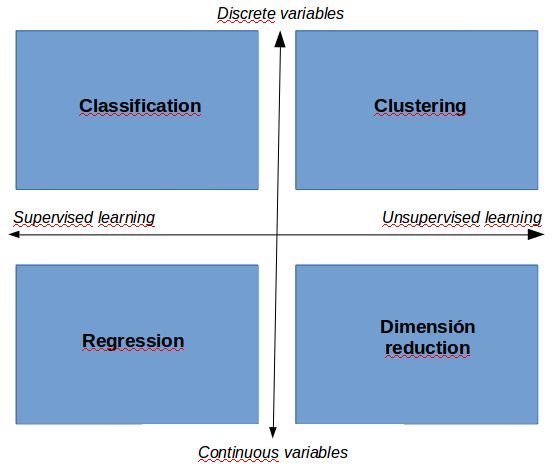

In [92]:
Image(filename='./AlgoritmoMachineLearning.png')

# ESTANDARIZAR

No obstante, debemos tener en cuenta que el rango de datos de nuestros valores en la mayoría de columnas no es muy amplio, no hay muchos valores únicos de Edad distintos, ni de Frecuencia Cardiaca Máxima ni en Tipo de Molestia, por ejemplo. Todo ello se debe a que en muchas de las variables, como ya hemos explicado anteriormente, solo encontramos unas pocos posibles valores que han sido medidos en números. \
Sin embargo, encontramos un campo que se movía entre muchos valores distintos y algo más grandes que el resto. Se trata de **Colesterol**, por ello decidimos normalizarlo de manera que no fuese tan extremo en relación al resto de características que estamos estudiando.

In [212]:
vectorizer = ft.VectorAssembler(inputCols=['Colesterol'], outputCol='Colesterol_vec')

In [213]:
normalizer = ft.StandardScaler(
    inputCol=vectorizer.getOutputCol(), 
    outputCol='normalized', 
    withMean=True,
    withStd=True
)

In [214]:
featuresCreator2 = ft.VectorAssembler(
    inputCols=['Edad','Genero','MT','PArterial','Glucemia','EcgReposo','FCM','AIE','STDep','Pendiente','Vasos','TipoDefecto'], 
    outputCol='features'
)

In [215]:
logistic1 = cl.LogisticRegression(
    maxIter=50, 
    regParam=0.3, 
    labelCol='Enfermedad')

In [216]:
evaluator1 = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability', 
    labelCol='Enfermedad')

In [217]:
pipeline = Pipeline(stages=[vectorizer, normalizer, featuresCreator2, logistic1])
#data_standardized = pipeline.fit(heart_df).transform(heart_df)
data_standardized = pipeline.fit(heart_train)

In [218]:
test_model = data_standardized.transform(heart_test)

In [219]:
print(evaluator1.evaluate(test_model, 
     {evaluator1.metricName: 'areaUnderROC'})) #area bajo la curva ROC
print(evaluator1.evaluate(test_model, {evaluator1.metricName: 'areaUnderPR'}))#area bajo PR

0.907070707070707
0.9162569456369315


In [220]:
evaluatorALG = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="accuracy")
accuracy = evaluatorALG.evaluate(test_model)
print("Accuracy = %g" % accuracy)
 
evaluatorf1 = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="f1")
f1 = evaluatorf1.evaluate(test_model)
print("f1 = %g" % f1)
 
evaluatorwp = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedPrecision")
wp = evaluatorwp.evaluate(test_model)
print("weightedPrecision = %g" % wp)
 
evaluatorwr = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedRecall")
wr = evaluatorwr.evaluate(test_model)
print("weightedRecall = %g" % wr)

Accuracy = 0.809524
f1 = 0.805168
weightedPrecision = 0.828952
weightedRecall = 0.809524


In [159]:
data_standardized.transform(heart_df).take(1)

[Row(Edad=63, Genero=1, MT=3, PArterial=145, Colesterol=233, Glucemia=1, EcgReposo=0, FCM=150, AIE=0, STDep=2.3, Pendiente=0, Vasos=0, TipoDefecto=1, Enfermedad=1.0, Colesterol_vec=DenseVector([233.0]), normalized=DenseVector([-0.2469]), features=DenseVector([63.0, 1.0, 3.0, 145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0]), rawPrediction=DenseVector([-1.5474, 1.5474]), probability=DenseVector([0.1755, 0.8245]), prediction=1.0)]

## Extracción de características 

##### El proceso de selección consiste en escoger un subconjunto de un conjunto más grande de características

Ordena los rasgos basados en el test Chi Cuadrado, que es independiente de la clase, y luego filtra los rasgos superiores de los que más depende la etiqueta de la clase. Este selector es útil para mejorar el poder de predicción de un modelo.

In [90]:
#lo que nosotras deberíamos hacer
import pyspark.sql.types as typ
from pyspark.ml.feature import ChiSqSelector 

In [91]:
selector = ChiSqSelector(numTopFeatures=4, featuresCol="features", outputCol="selectedFeatures", labelCol="Enfermedad")
pipelinechi = Pipeline(stages=[featuresCreator,selector])

In [92]:
result = pipelinechi.fit(heart_df).transform(heart_df)

In [93]:
print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())
result.show(4) 

ChiSqSelector output with top 4 features selected
+----+------+---+---------+----------+--------+---------+---+---+-----+---------+-----+-----------+----------+--------------------+-----------------+
|Edad|Genero| MT|PArterial|Colesterol|Glucemia|EcgReposo|FCM|AIE|STDep|Pendiente|Vasos|TipoDefecto|Enfermedad|            features| selectedFeatures|
+----+------+---+---------+----------+--------+---------+---+---+-----+---------+-----+-----------+----------+--------------------+-----------------+
|  63|     1|  3|      145|       233|       1|        0|150|  0|  2.3|        0|    0|          1|       1.0|[63.0,1.0,3.0,145...|[3.0,0.0,0.0,1.0]|
|  37|     1|  2|      130|       250|       0|        1|187|  0|  3.5|        0|    0|          2|       1.0|[37.0,1.0,2.0,130...|[2.0,0.0,0.0,2.0]|
|  41|     0|  1|      130|       204|       0|        0|172|  0|  1.4|        2|    0|          2|       1.0|[41.0,0.0,1.0,130...|[1.0,0.0,0.0,2.0]|
|  56|     1|  1|      120|       236|       0|   

In [89]:
result.select('selectedFeatures').show(3)

+-----------------+
| selectedFeatures|
+-----------------+
|[3.0,0.0,0.0,1.0]|
|[2.0,0.0,0.0,2.0]|
|[1.0,0.0,0.0,2.0]|
+-----------------+
only showing top 3 rows



In [90]:
result.head().selectedFeatures

DenseVector([3.0, 0.0, 0.0, 1.0])

In [79]:
result.selectedFeatures

[3, 9, 12, 13]


ChiSqSelector ha seleccionado las columnas 3, 9, 12 y 13 como las cuatro con mayor importancia sobre nuestra columna objetivo.\
Dichos campos son Molestia Torácica, Angina inducida por el Ejercicio, Número de Vasos Principales y Tipo de Defecto.

### Lo aplicamos a Random Forest

In [94]:
assembler = ft.VectorAssembler(
    inputCols=['MT','AIE','Vasos','TipoDefecto'], 
    outputCol='features'
)

In [95]:
classifier1 = cl.RandomForestClassifier(
    numTrees=10, 
    maxDepth=6, 
    labelCol='Enfermedad')

In [96]:
heart_train5, heart_test5 =  heart_df.randomSplit([0.7, 0.3], seed=666)

In [97]:
pipeline = Pipeline(
    stages=[assembler, classifier1])

model = pipeline.fit(heart_train5)
test = model.transform(heart_test5)

In [98]:
print(evaluatorRF.evaluate(test, 
     {evaluatorRF.metricName: 'areaUnderROC'}))
print(evaluatorRF.evaluate(test, {evaluatorRF.metricName: 'areaUnderPR'}))

0.8768115942028987
0.8456061131861997


In [99]:
predictions = model.transform(heart_test5)

In [100]:
evaluatorARF = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="accuracy")
accuracy = evaluatorARF.evaluate(predictions)
print("Accuracy = %g" % accuracy)
 
evaluatorf1 = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="f1")
f1 = evaluatorf1.evaluate(predictions)
print("f1 = %g" % f1)
 
evaluatorwp = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedPrecision")
wp = evaluatorwp.evaluate(predictions)
print("weightedPrecision = %g" % wp)
 
evaluatorwr = MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedRecall")
wr = evaluatorwr.evaluate(predictions)
print("weightedRecall = %g" % wr)

Accuracy = 0.813187
f1 = 0.813187
weightedPrecision = 0.813383
weightedRecall = 0.813187


### Lo aplicamos a Logistic Regression

In [101]:
pipeline = Pipeline(stages=[assembler, logistic1])

In [102]:
model = pipeline.fit(heart_train)

In [103]:
test_model = model.transform(heart_test)

In [105]:
print(evaluator1.evaluate(test_model, 
     {evaluator1.metricName: 'areaUnderROC'})) #area bajo la curva ROC
print(evaluator1.evaluate(test_model, {evaluator1.metricName: 'areaUnderPR'})) #bajo PR

0.8357487922705313
0.7758201886523459


In [106]:
predictions = model.transform(heart_test)

In [107]:
evaluatorALG = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="accuracy")
accuracy = evaluatorALG.evaluate(predictions)
print("Accuracy = %g" % accuracy)
 
evaluatorf1 = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="f1")
f1 = evaluatorf1.evaluate(predictions)
print("f1 = %g" % f1)
 
evaluatorwp = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedPrecision")
wp = evaluatorwp.evaluate(predictions)
print("weightedPrecision = %g" % wp)
 
evaluatorwr = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedRecall")
wr = evaluatorwr.evaluate(predictions)
print("weightedRecall = %g" % wr)

Accuracy = 0.747253
f1 = 0.743854
weightedPrecision = 0.763226
weightedRecall = 0.747253


## PCA

PCA es una técnica matemática para encontrar los aspectos más importantes de nuestros datos. Cambia la representación de los rasgos de nuestros datos creando un nuevo conjunto de features. Cada nueva característica es una combinación de las características originales. El poder de PCA es que puede crear un conjunto más pequeño de características más significativas para ser introducidas en su modelo.

In [117]:
#featuresCreatorPCA = ft.VectorAssembler(inputCols=['Edad','Genero','EcgReposo','Vasos'], outputCol='features')

PCA toma un parámetro k, especificando el número de características de salida a crear. Generalmente, esto debería ser mucho más pequeño que la dimensión de sus vectores de entrada.

In [119]:
from pyspark.ml.feature import PCA
pca = PCA(k=2, inputCol='features', outputCol='pcaFeature')
#lr = cl.LogisticRegression(maxIter=10, regParam=0.3).setLabelCol('Enfermedad')
pipelinePCA = Pipeline(stages=[featuresCreator,pca,logistic1])

Entrenamos y evaluamos el modelo igual que anteriormente

In [122]:
model2 = pipelinePCA.fit(heart_train)
test_model = model2.transform(heart_test5)
#test_model.show()

In [121]:
test_model.select('pcaFeature').distinct().show(3)

+--------------------+
|          pcaFeature|
+--------------------+
|[-273.84475460670...|
|[-307.41907567324...|
|[-172.16606376989...|
+--------------------+
only showing top 3 rows



In [123]:
print(evaluator.evaluate(test_model, 
     {evaluator.metricName: 'areaUnderROC'})) #area bajo la curva ROC
print(evaluator.evaluate(test_model, {evaluator.metricName: 'areaUnderPR'}))

0.9009661835748793
0.9023919947343534


In [126]:
predictions = model2.transform(heart_test)

In [127]:
evaluatorALG = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="accuracy")
accuracy = evaluatorALG.evaluate(predictions)
print("Accuracy = %g" % accuracy)
 
evaluatorf1 = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="f1")
f1 = evaluatorf1.evaluate(predictions)
print("f1 = %g" % f1)
 
evaluatorwp = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedPrecision")
wp = evaluatorwp.evaluate(predictions)
print("weightedPrecision = %g" % wp)
 
evaluatorwr = ev.MulticlassClassificationEvaluator(labelCol="Enfermedad", metricName="weightedRecall")
wr = evaluatorwr.evaluate(predictions)
print("weightedRecall = %g" % wr)

Accuracy = 0.853774
f1 = 0.851167
weightedPrecision = 0.860337
weightedRecall = 0.853774


## CONCLUSIÓN

- Aprendizaje y entendimiento de **Apache Spark**  
  
- Esto en añadido al estudio de algoritmos ML concluye en el proyecto realizado
  
- Mejores resultados con **KFold** en ambos algoritmos y con **PCA**

- Todo esto nos ayuda en el desarrollo del resto de asignaturas

- Estamos formando una base sólida de conocimientos

## FIN